In [476]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.feature_selection import VarianceThreshold, RFECV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [477]:
try:
    # Attempt to load the dataset from CSV file
    Bank = pd.read_csv('bank-full.csv', delimiter=';', encoding='utf-8')
    print("It was successfully loaded.")
except Exception as e:
    # Print failure message if loading fails
    print("Failed to load the dataset.")
    print(f"Error: {e}")

It was successfully loaded.


In [478]:
# Viewing the first 5 row of the dataset
Bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [479]:
Bank.shape

(45211, 17)

In [480]:
# Using print  to view all variables in one page
print(Bank.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [481]:
# Rename the target variable 'y' to 'Subscription'
Bank.rename(columns={'y': 'Subscription'}, inplace=True)
# see the Bank data informamtion as well
# Verify the change
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   age           45211 non-null  int64 
 1   job           45211 non-null  object
 2   marital       45211 non-null  object
 3   education     45211 non-null  object
 4   default       45211 non-null  object
 5   balance       45211 non-null  int64 
 6   housing       45211 non-null  object
 7   loan          45211 non-null  object
 8   contact       45211 non-null  object
 9   day           45211 non-null  int64 
 10  month         45211 non-null  object
 11  duration      45211 non-null  int64 
 12  campaign      45211 non-null  int64 
 13  pdays         45211 non-null  int64 
 14  previous      45211 non-null  int64 
 15  poutcome      45211 non-null  object
 16  Subscription  45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [482]:
Bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [483]:
# List all categorical variables in the dataset
categorical_columns = Bank.select_dtypes(include=['object']).columns.tolist()
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'Subscription']

In [484]:
# List all columns with integer and/or float data types in the dataset
numerical_columns = Bank.select_dtypes(include=['int64', 'float']).columns.tolist()
#numerical_columns = [col for col in numerical_columns if col != 'Subscription_Binary']
numerical_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [485]:
# checking for missing values
Bank.isna().sum()

age             0
job             0
marital         0
education       0
default         0
balance         0
housing         0
loan            0
contact         0
day             0
month           0
duration        0
campaign        0
pdays           0
previous        0
poutcome        0
Subscription    0
dtype: int64

In [486]:
# checking for duplicates
Bank.duplicated().any()

False

# ---------Exploratory Data Analysis (EDA)-----------

No Subscription: 39922, Subscribed: 5289
Subscription
no     39922
yes     5289
Name: count, dtype: int64


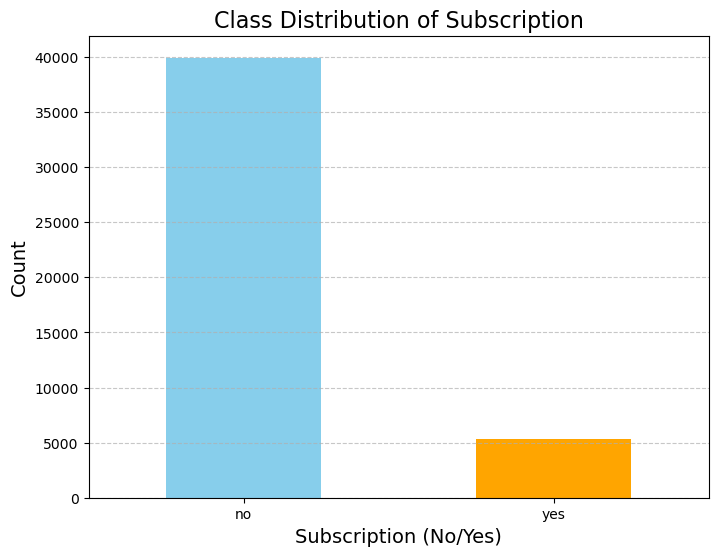

In [488]:
# Count occurrences of each subscription category in the dataset
subscription_counts = Bank['Subscription'].value_counts()

print(f"No Subscription: {subscription_counts.get('no', 0)}, Subscribed: {subscription_counts.get('yes', 0)}\n{subscription_counts}")

# Plot the distribution of the 'Subscription' variable
plt.figure(figsize=(8, 6))
subscription_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Class Distribution of Subscription', fontsize=16)
plt.xlabel('Subscription (No/Yes)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### distribution by subscription outcome

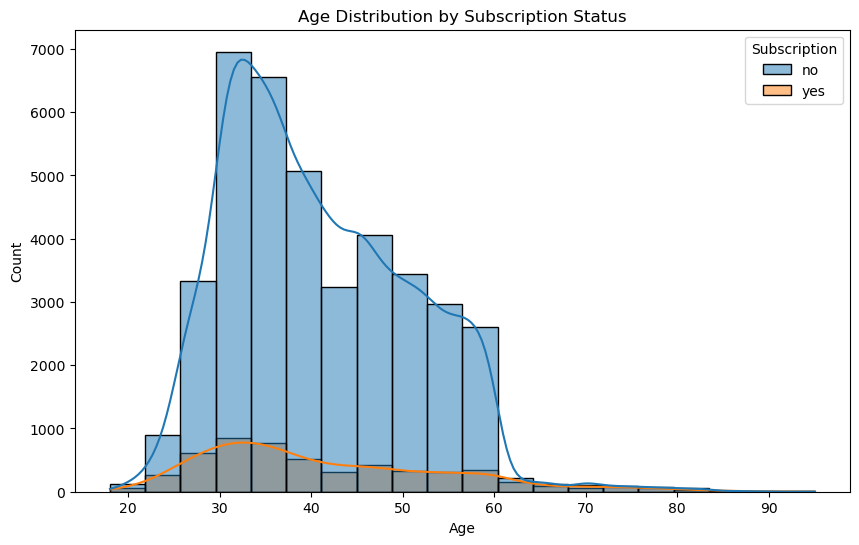

In [489]:
# Plot age distribution by subscription outcome
plt.figure(figsize=(10, 6))
sns.histplot(data=Bank, x='age', hue='Subscription', bins=20, kde=True)
plt.title("Age Distribution by Subscription Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


### Relationshionship between Subscrition(y) against campaign, day, month etc.

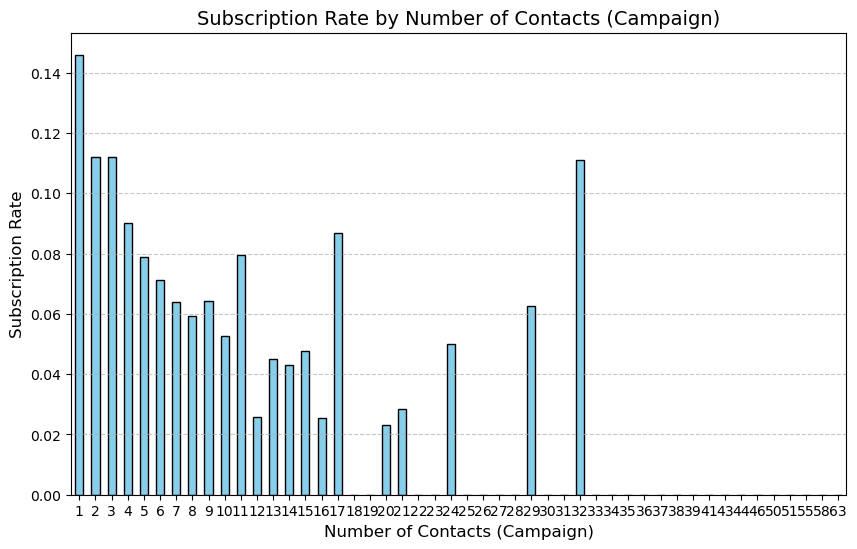

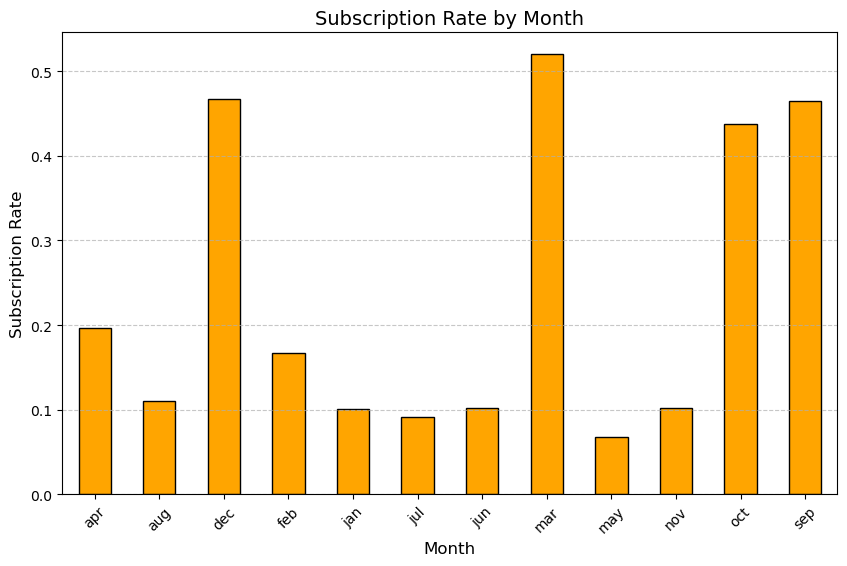

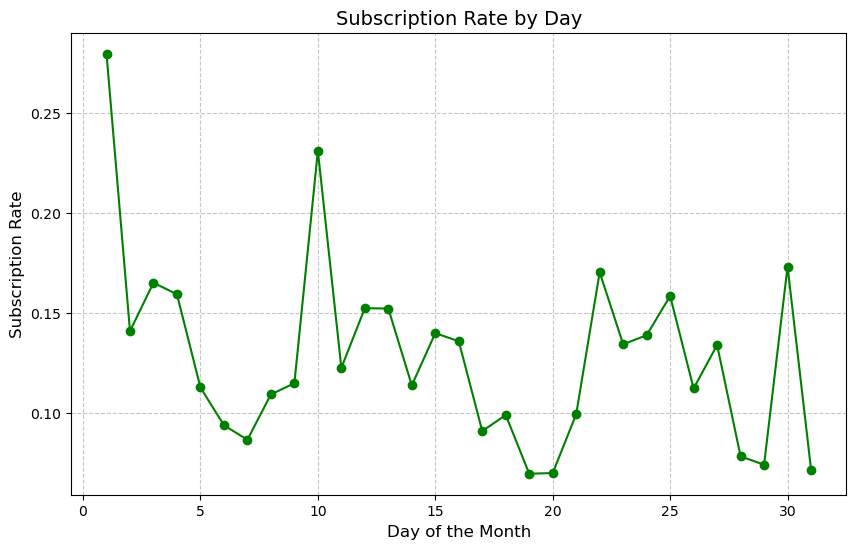

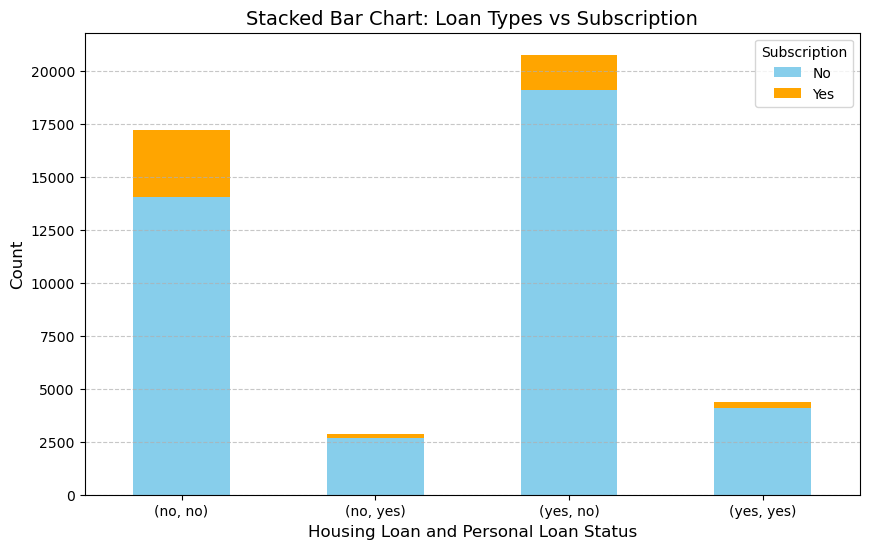

In [490]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Subscription' is binary for calculations
Bank['Subscription_Binary'] = Bank['Subscription'].apply(lambda x: 1 if x == 'yes' else 0)

# Campaign vs. Subscription Rates (Bar Plot)
campaign_subscription_rate = Bank.groupby('campaign')['Subscription_Binary'].mean()
plt.figure(figsize=(10, 6))
campaign_subscription_rate.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Subscription Rate by Number of Contacts (Campaign)", fontsize=14)
plt.xlabel("Number of Contacts (Campaign)", fontsize=12)
plt.ylabel("Subscription Rate", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Subscription Trends by Month or Day (Bar Charts)
# Subscription by Month
month_subscription_rate = Bank.groupby('month')['Subscription_Binary'].mean().sort_index()
plt.figure(figsize=(10, 6))
month_subscription_rate.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Subscription Rate by Month", fontsize=14)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Subscription Rate", fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Subscription by Day
day_subscription_rate = Bank.groupby('day')['Subscription_Binary'].mean()
plt.figure(figsize=(10, 6))
day_subscription_rate.plot(kind='line', marker='o', color='green')
plt.title("Subscription Rate by Day", fontsize=14)
plt.xlabel("Day of the Month", fontsize=12)
plt.ylabel("Subscription Rate", fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.show()

# Stacked Bar Chart for Loans and Subscriptions
loan_subscription_counts = Bank.groupby(['housing', 'loan', 'Subscription'])['Subscription'].count().unstack()
loan_subscription_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'orange'])
plt.title("Stacked Bar Chart: Loan Types vs Subscription", fontsize=14)
plt.xlabel("Housing Loan and Personal Loan Status", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Subscription", labels=['No', 'Yes'])
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Distribution of age, balance and duration 

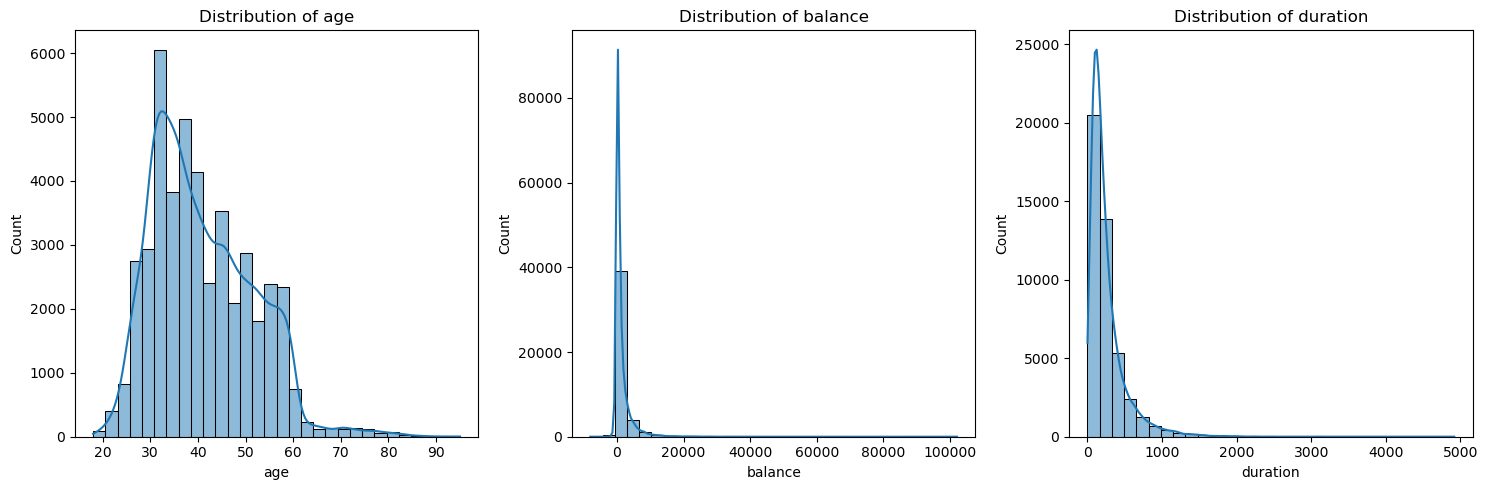

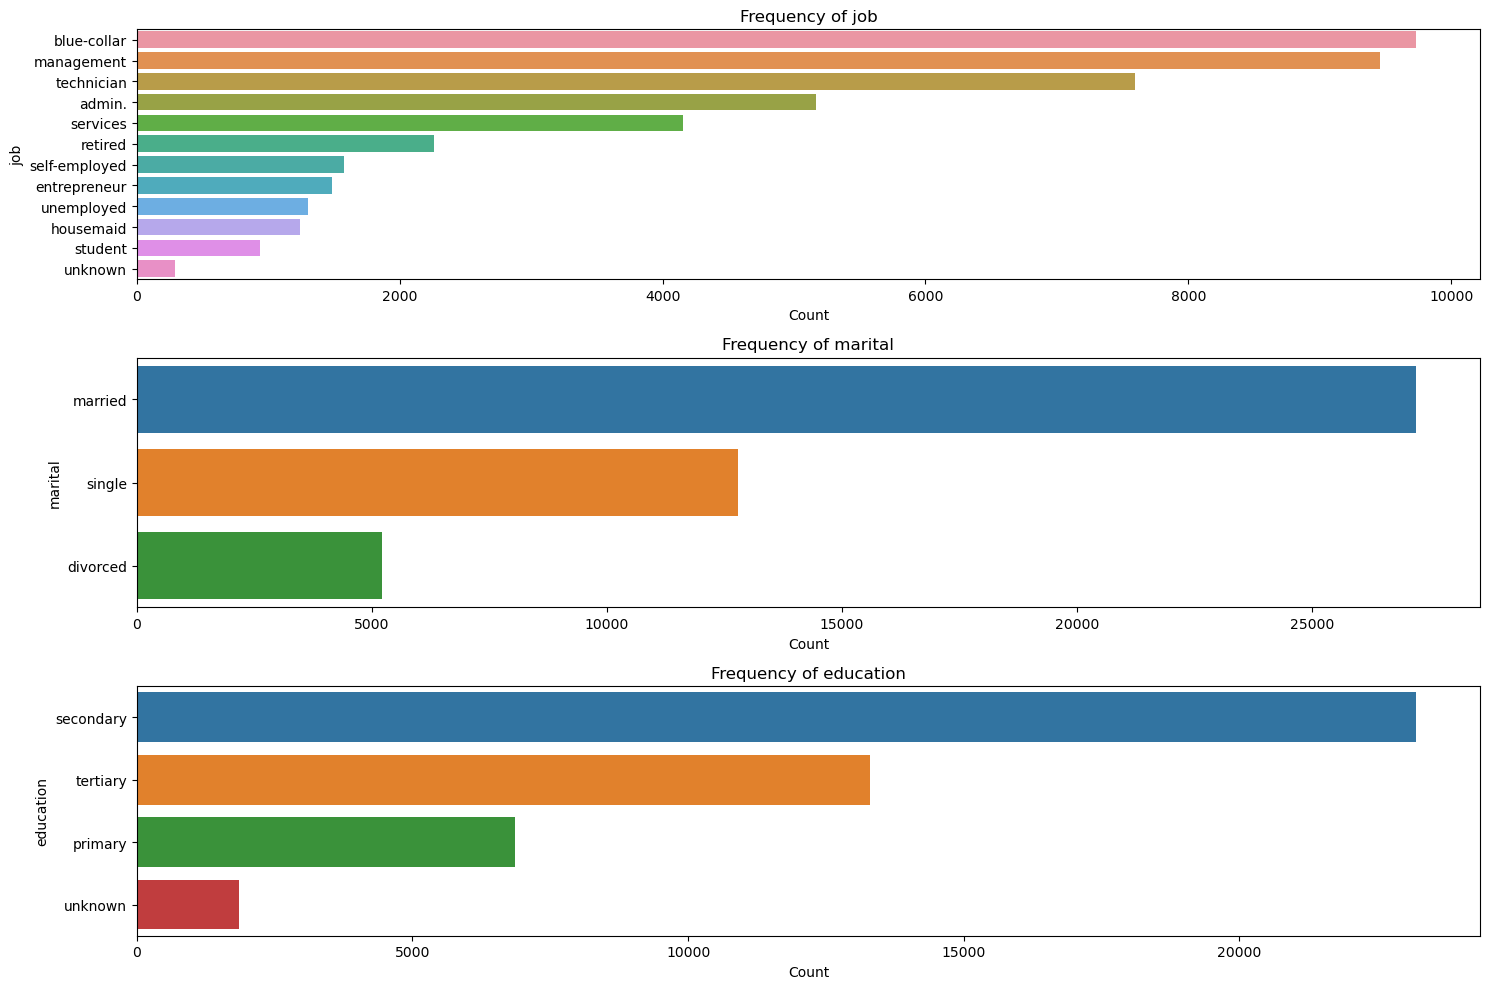

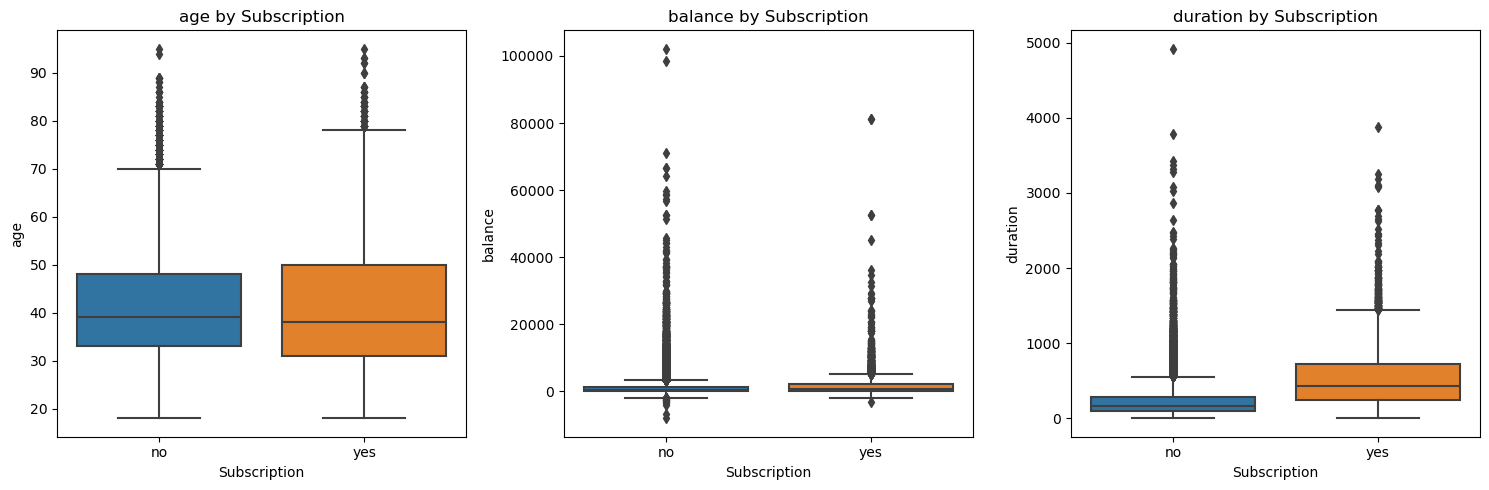

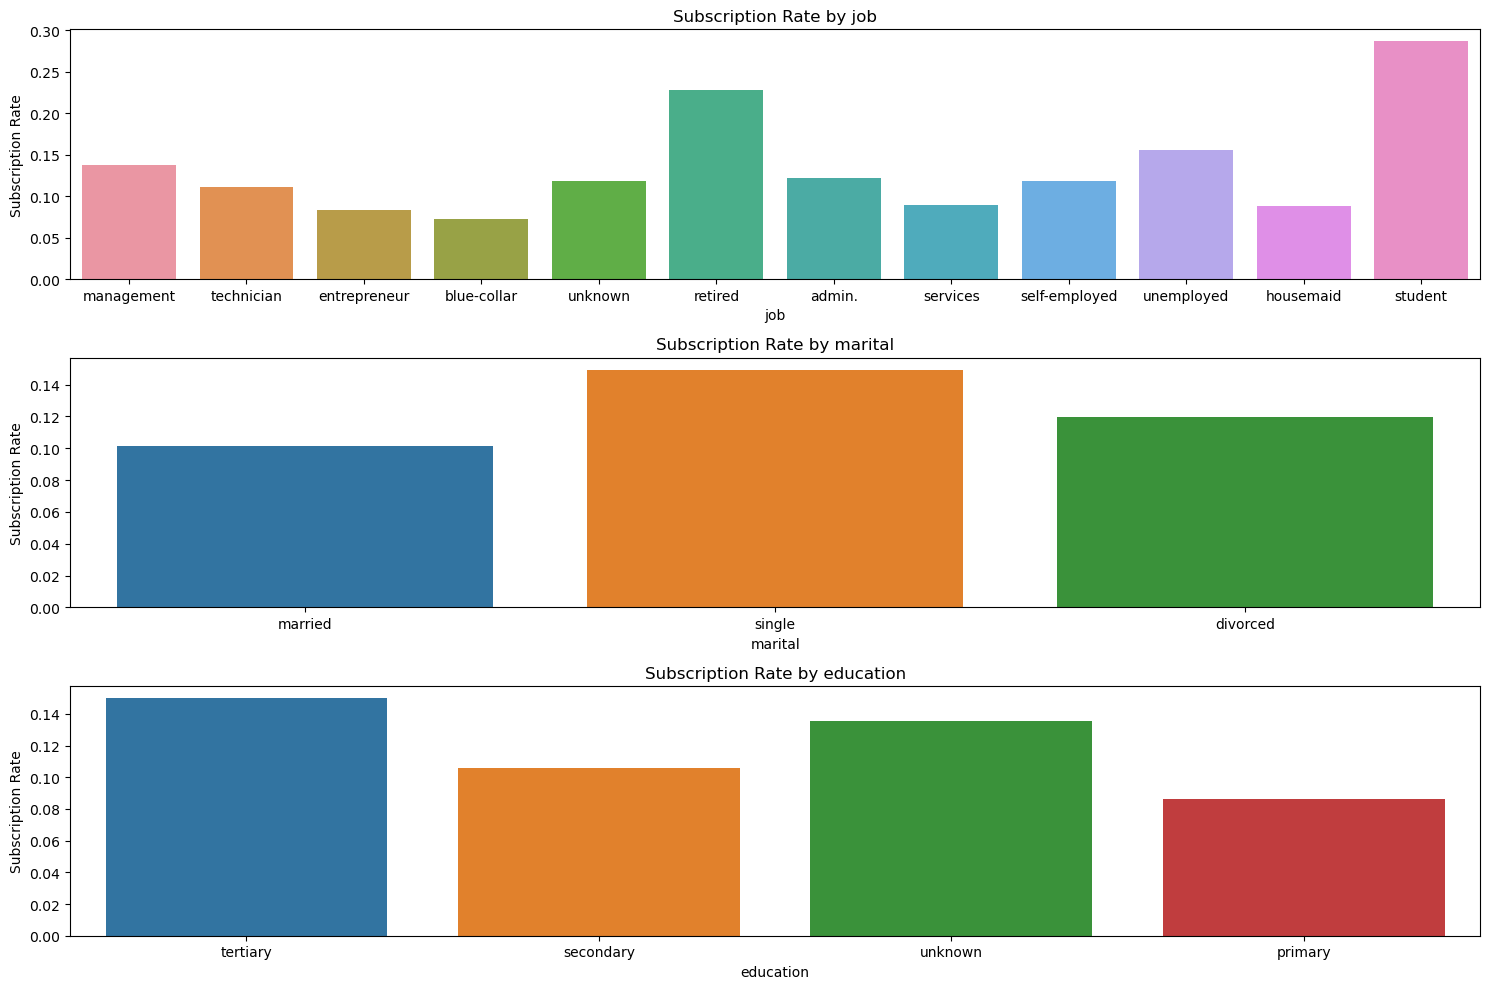

In [491]:
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical Features Analysis (2)
numerical_features = ['age', 'balance', 'duration']  # Add more if needed
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.histplot(data=Bank, x=col, kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

# Categorical Features Analysis (3)
categorical_features = ['job', 'marital', 'education']  # Add more if needed
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(len(categorical_features), 1, i)
    sns.countplot(data=Bank, y=col, order=Bank[col].value_counts().index)
    plt.title(f"Frequency of {col}")
    plt.xlabel("Count")
plt.tight_layout()
plt.show()

# Target vs. Features Relationships (4)
# Boxplots for numerical features
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_features, 1):
    plt.subplot(1, len(numerical_features), i)
    sns.boxplot(data=Bank, x='Subscription', y=col)  # Assuming target column is named 'Subscription'
    plt.title(f"{col} by Subscription")
plt.tight_layout()
plt.show()

# Bar plots for categorical features
plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(len(categorical_features), 1, i)
    sns.barplot(
        data=Bank, x=col, y=Bank['Subscription'].apply(lambda x: 1 if x == 'yes' else 0), ci=None
    )
    plt.title(f"Subscription Rate by {col}")
    plt.ylabel("Subscription Rate")
plt.tight_layout()
plt.show()


## correlation matrix for numerical features

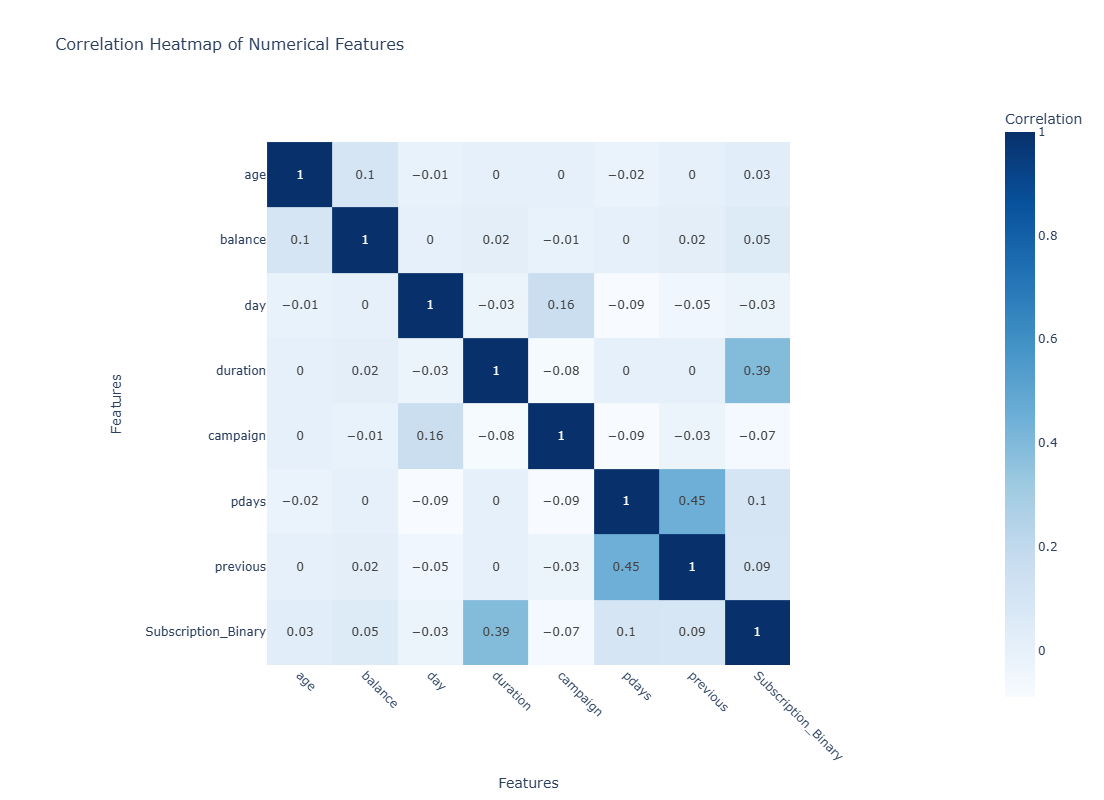

In [493]:

# Compute correlation matrix for numerical features and round to 2 decimal places
correlation_matrix = Bank.select_dtypes(include=['number']).corr().round(2)

# Create a heatmap using Plotly with a softer color scale
fig = px.imshow(
    correlation_matrix,
    text_auto=True,
    color_continuous_scale='blues',  # Softer, easier-on-the-eye color scale
    title="Correlation Heatmap of Numerical Features",
    labels=dict(color='Correlation'),
)

# Customize the layout for better readability
fig.update_layout(
    title_font_size=16,
    xaxis=dict(tickangle=45, title_text="Features"),
    yaxis=dict(title_text="Features"),
    width=800,
    height=800
)

# Show the interactive heatmap
fig.show()


## Removing the target variable from lists

In [495]:
# Remove the target variable from lists
if Subscription in categorical_columns:
    categorical_columns.remove(Subscription)
    # Remove Subscription_Binary after use for visualisation
del Bank['Subscription_Binary']

### Explicit one-hot encoding process on categorical variables

In [496]:
# Explicit one-hot encoding process
onehot_enc = OneHotEncoder(drop='first', sparse=False)  # Define encoder
onehot_encoded = onehot_enc.fit_transform(Bank[categorical_columns])  # Fit and transform categorical columns

# Create a DataFrame for the encoded columns
encoded_columns = onehot_enc.get_feature_names_out(categorical_columns)
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=encoded_columns)

# Concatenate the one-hot encoded DataFrame with the rest of the dataset
Bank = pd.concat([Bank.drop(columns=categorical_columns), onehot_encoded_df], axis=1)
# Now Bank contains only numerical columns, with categorical variables one-hot encoded
print(Bank.head())

   age  balance  day  duration  campaign  pdays  previous Subscription  \
0   58     2143    5       261         1     -1         0           no   
1   44       29    5       151         1     -1         0           no   
2   33        2    5        76         1     -1         0           no   
3   47     1506    5        92         1     -1         0           no   
4   33        1    5       198         1     -1         0           no   

   job_blue-collar  job_entrepreneur  ...  month_jul  month_jun  month_mar  \
0              0.0               0.0  ...        0.0        0.0        0.0   
1              0.0               0.0  ...        0.0        0.0        0.0   
2              0.0               1.0  ...        0.0        0.0        0.0   
3              1.0               0.0  ...        0.0        0.0        0.0   
4              0.0               0.0  ...        0.0        0.0        0.0   

   month_may  month_nov  month_oct  month_sep  poutcome_other  \
0        1.0        0

### Define features and target

In [498]:
# Define features excluding target# #y = Bank[Subscription]
X = Bank.drop(columns=[Subscription])
# Define target feature
y = (Bank[Subscription] == 'yes').astype(int)  # Encode target as binary: 'yes' -> 1, 'no' -> 0

### Encoded target variable "y" or Subscription

In [500]:
set(y)

{0, 1}

### All other Feaatures

In [502]:
X

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,44,29,5,151,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,33,2,5,76,1,-1,0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,47,1506,5,92,1,-1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,33,1,5,198,1,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
45207,71,1729,17,456,2,-1,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
45208,72,5715,17,1127,5,184,3,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
45209,57,668,17,508,4,-1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Split data into train and test sets

In [504]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

## Standardize numerical features

In [506]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Verify that only numerical data remains
print(X_train_scaled.dtypes)

age                    float64
balance                float64
day                    float64
duration               float64
campaign               float64
pdays                  float64
previous               float64
job_blue-collar        float64
job_entrepreneur       float64
job_housemaid          float64
job_management         float64
job_retired            float64
job_self-employed      float64
job_services           float64
job_student            float64
job_technician         float64
job_unemployed         float64
job_unknown            float64
marital_married        float64
marital_single         float64
education_secondary    float64
education_tertiary     float64
education_unknown      float64
default_yes            float64
housing_yes            float64
loan_yes               float64
contact_telephone      float64
contact_unknown        float64
month_aug              float64
month_dec              float64
month_feb              float64
month_jan              float64
month_ju

## Define features and target

In [511]:
X_train_scaled

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
4951,-0.656432,-0.006173,0.626912,-0.730979,-0.571840,-0.411088,-0.238056,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7643,-0.468198,-0.090126,1.709521,-0.508180,-0.571840,-0.411088,-0.238056,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
38788,-0.750550,-0.272185,0.266043,-0.923048,0.728210,3.207392,1.821470,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
13276,-0.562315,-0.238089,-0.936856,0.997638,-0.246827,-0.411088,-0.238056,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
37452,1.508263,-0.432372,-0.335407,0.459846,-0.246827,3.197368,0.173850,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28070,-0.374081,-0.428512,1.468941,-0.020326,-0.246827,-0.411088,-0.238056,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
18,1.790615,-0.421114,-1.297726,-0.150932,-0.571840,-0.411088,-0.238056,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
43317,-0.844667,0.080353,0.145753,-0.285380,-0.571840,2.816476,0.585755,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
24196,-0.374081,-0.304995,0.145753,-0.665676,-0.571840,-0.411088,-0.238056,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [512]:
# Apply VarianceThreshold
variance_selector = VarianceThreshold(threshold=0)
X_train_fs = variance_selector.fit_transform(X_train_scaled)
X_test_fs = variance_selector.transform(X_test_scaled)

print("Shape after VarianceThreshold:", X_train_fs.shape, X_test_fs.shape)

Shape after VarianceThreshold: (31647, 42) (13564, 42)


In [513]:
# Recursive Feature Elimination with Cross-Validation (RFECV)

# Initialize the Random Forest classifier
rf = RandomForestClassifier(random_state=0)

# Apply RFECV to select the optimal number of features
rfecv = RFECV(estimator=rf, cv=5, step=1, scoring='accuracy')
X_train_rfe = rfecv.fit_transform(X_train_fs, y_train)
X_test_rfe = rfecv.transform(X_test_fs)

# Display the resulting shape after feature elimination
(X_train_rfe.shape, X_test_rfe.shape)

((31647, 37), (13564, 37))

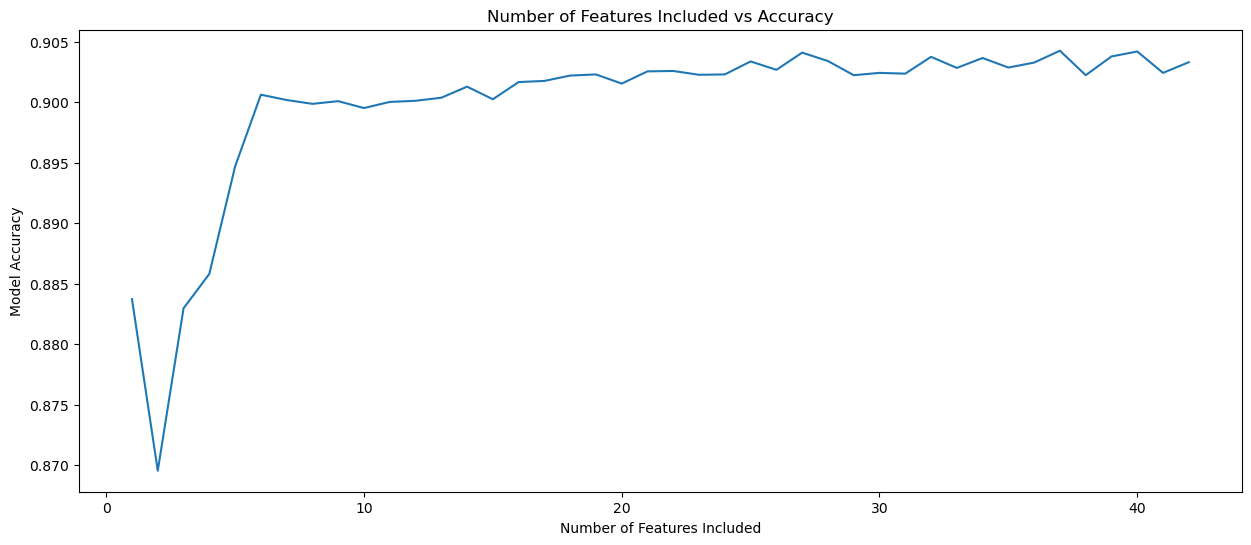

In [514]:
# Number of features considered in RFECV
n_features = len(rfecv.cv_results_['mean_test_score'])

plt.figure(figsize=(15, 6))
plt.title('Number of Features Included vs Accuracy')
plt.xlabel('Number of Features Included')
plt.ylabel('Model Accuracy')

# Plotting with the correct x-axis length
plt.plot(range(1, n_features + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

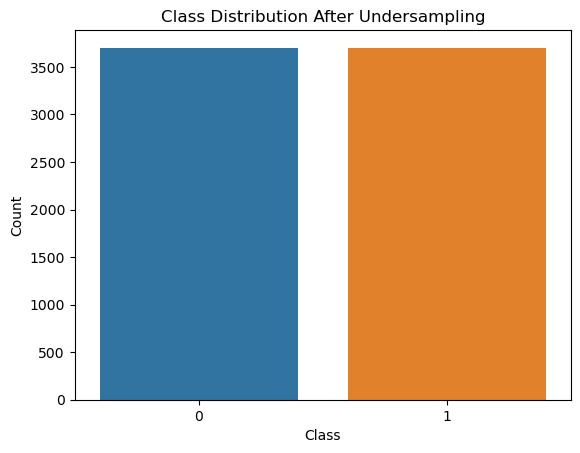

In [515]:
# Handle class imbalance with RandomUnderSampler
undersampler = RandomUnderSampler(random_state=0)
X_train_balanced, y_train_balanced = undersampler.fit_resample(X_train_rfe, y_train)

# Visualize the class distribution after undersampling
sns.countplot(x=y_train_balanced)
plt.title("Class Distribution After Undersampling")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

##  Train and evaluate Decision Tree, and Random Forest classifiers

### Decision Tree Classifier

Decision Tree Accuracy: 0.8030816868180478
Decision Tree Confusion Matrix:
 [[9634 2343]
 [ 328 1259]]
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.80      0.88     11977
           1       0.35      0.79      0.49      1587

    accuracy                           0.80     13564
   macro avg       0.66      0.80      0.68     13564
weighted avg       0.89      0.80      0.83     13564



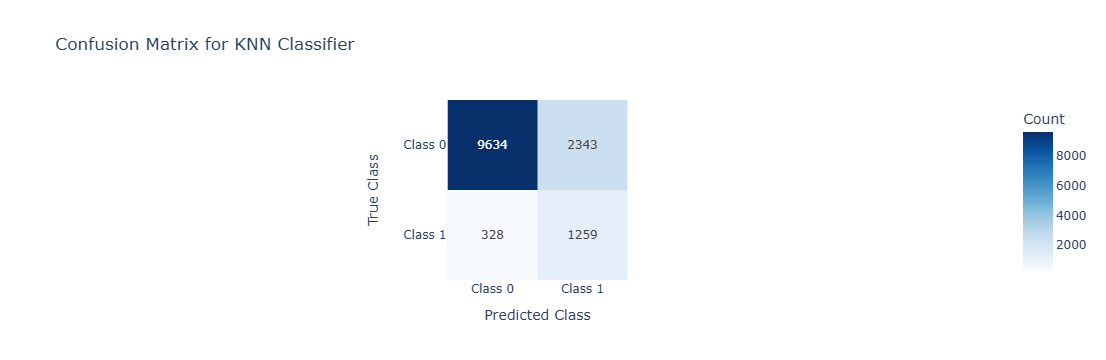

In [518]:
# Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='entropy', random_state=0)
dt.fit(X_train_balanced, y_train_balanced)
y_pred_dt = dt.predict(X_test_rfe)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Decision Tree Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

# Compute the confusion matrix for KNN
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Create a heatmap for the confusion matrix using Plotly
fig = px.imshow(
    cm_dt,
    text_auto=True,
    color_continuous_scale='Blues',
    title="Confusion Matrix for KNN Classifier",
    labels=dict(x="Predicted Class", y="True Class", color="Count")
)

# Customize axis labels to match class names
fig.update_layout(
    xaxis=dict(tickmode="array", tickvals=[0, 1], ticktext=["Class 0", "Class 1"]),
    yaxis=dict(tickmode="array", tickvals=[0, 1], ticktext=["Class 0", "Class 1"])
)

# Display the heatmap
fig.show()


## Hyperparameter tuning for Decision Tree model using GridSearchCV

In [520]:
# Decision Tree Tuning
param_grid_dt = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10]}
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train_balanced, y_train_balanced)
print("Best Decision Tree Parameters:", grid_search_dt.best_params_)
print("Best Decision Tree Score:", grid_search_dt.best_score_)

Best Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}
Best Decision Tree Score: 0.8236107816121321


## Random Forest Classifier

Random Forest Accuracy: 0.8304335004423474
Random Forest Confusion Matrix:
 [[9830 2147]
 [ 153 1434]]
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.82      0.90     11977
           1       0.40      0.90      0.55      1587

    accuracy                           0.83     13564
   macro avg       0.69      0.86      0.73     13564
weighted avg       0.92      0.83      0.86     13564



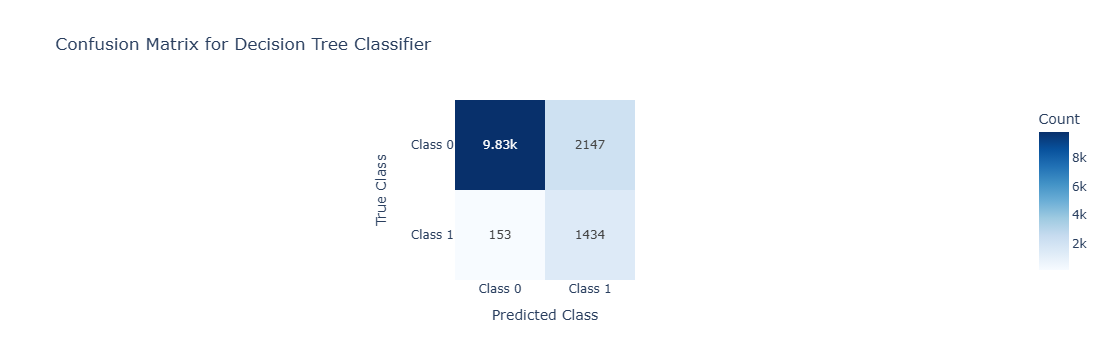

In [522]:
# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=0, n_estimators=100)
rf_classifier.fit(X_train_balanced, y_train_balanced)
y_pred_rf = rf_classifier.predict(X_test_rfe)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Compute the confusion matrix for the Decision Tree classifier
cm_rf = confusion_matrix(y_test, y_pred_rf)
# Create a heatmap for the confusion matrix using Plotly
fig = px.imshow(
    cm_rf,
    text_auto=True,
    color_continuous_scale='Blues',
    title="Confusion Matrix for Decision Tree Classifier",
    labels=dict(x="Predicted Class", y="True Class", color="Count")
)
# Customize axis labels to match class names
fig.update_layout(
    xaxis=dict(tickmode="array", tickvals=[0, 1], ticktext=["Class 0", "Class 1"]),
    yaxis=dict(tickmode="array", tickvals=[0, 1], ticktext=["Class 0", "Class 1"])
)
# Display the heatmap
fig.show()


## Hyperparameter tuning for Random Forest using GridSearchCV

In [524]:
# Random Forest Tuning
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=0), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_balanced, y_train_balanced)
print("Best Random Forest Parameters:", grid_search_rf.best_params_)
print("Best Random Forest Score:", grid_search_rf.best_score_)


Best Random Forest Parameters: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 100}
Best Random Forest Score: 0.8614269029326422


## ROC curves for detailed insights

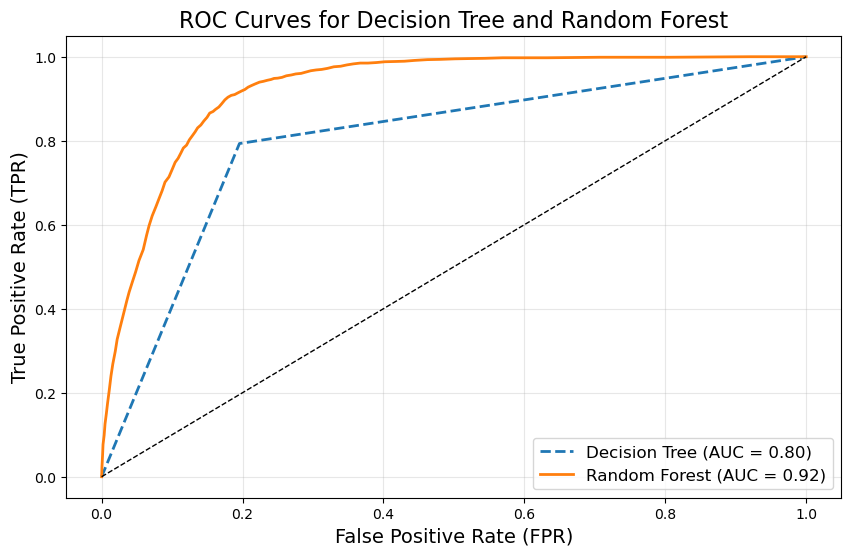

In [526]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Decision Tree ROC Curve
dt_probs = dt.predict_proba(X_test_rfe)[:, 1]  # Get probabilities for the positive class
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, dt_probs)
auc_dt = auc(fpr_dt, tpr_dt)

# Random Forest ROC Curve
rf_probs = rf_classifier.predict_proba(X_test_rfe)[:, 1]  # Get probabilities for the positive class
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf_probs)
auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, label=f"Decision Tree (AUC = {auc_dt:.2f})", linestyle='--', linewidth=2)
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})", linewidth=2)

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', lw=1)

# Customize the plot
plt.title("ROC Curves for Decision Tree and Random Forest", fontsize=16)
plt.xlabel("False Positive Rate (FPR)", fontsize=14)
plt.ylabel("True Positive Rate (TPR)", fontsize=14)
plt.legend(loc="lower right", fontsize=12)
plt.grid(alpha=0.3)
plt.show()
